<a href="https://colab.research.google.com/github/adrianomqs/FIAP_Modulo1_Tech_Challenge/blob/main/FIAP_Modulo1_Tech_Challenge_Unificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Custo de Seguro Médico com Regressão Linear
Este notebook realiza uma análise exploratória e predição de custos de seguros médicos utilizando regressão linear.
 O dataset inclui informações como idade, sexo, índice de massa corporal (IMC), número de dependentes, e custos de seguro.
 Vamos explorar a relação entre as características dos segurados e seus custos de seguro para desenvolver um modelo preditivo.


# Explorando os dados


*   age: idade do beneficiário principal
*   sex: sexto do beneficiário
*   bmi: IMC do beneficiário
*   children: número de filhos/dependentes
*  smoker: se o beneficário é fumante
*  region: região dos estados unidos onde a pessoa mora



In [75]:
CSV_FILE = "insurance.csv";
import pandas as pd

In [76]:
dados = pd.read_csv(CSV_FILE)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Renomeando as colunas
Renomeando as colunas para Português

In [77]:
colunas = {
    "age": "idade",
    "sex": "sexo",
    "bmi": "imc",
    "children": "filhos",
    "smoker": "fumante",
    "region": "regiao",
    "charges": "custos"
}

dados = dados.rename(columns = colunas)
dados.head()

,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
dados.shape

(1338, 7)

In [79]:
dados.describe()

,idade,imc,filhos,custos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observações:
Idade máxima: 64 anos
Máximo de 5 filhos/dependentes

In [80]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idade    1338 non-null   int64  
 1   sexo     1338 non-null   object 
 2   imc      1338 non-null   float64
 3   filhos   1338 non-null   int64  
 4   fumante  1338 non-null   object 
 5   regiao   1338 non-null   object 
 6   custos   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Verificando a existencia de dados nulos:

In [81]:
dados.isnull().sum()

idade      0
sexo       0
imc        0
filhos     0
fumante    0
regiao     0
custos     0
dtype: int64

Observações:
sem valores nulos

Verificando a existencia de duplicados

In [82]:
dados.duplicated().sum()

1

In [83]:
dados.drop_duplicates(inplace = True)
dados.reset_index(drop = True, inplace = True)
dados.head()

,idade,sexo,imc,filhos,fumante,regiao,custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Observações:
Verificamos a existencia de dado duplicado, e foi feita a remoção.

## Analisando os dados categóricos

In [84]:
dados.sexo.value_counts()

sexo
male      675
female    662
Name: count, dtype: int64

In [85]:
dados.fumante.value_counts()

fumante
no     1063
yes     274
Name: count, dtype: int64

In [86]:
dados.regiao.value_counts()

regiao
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### Visualindo os dados utilizando gráficos

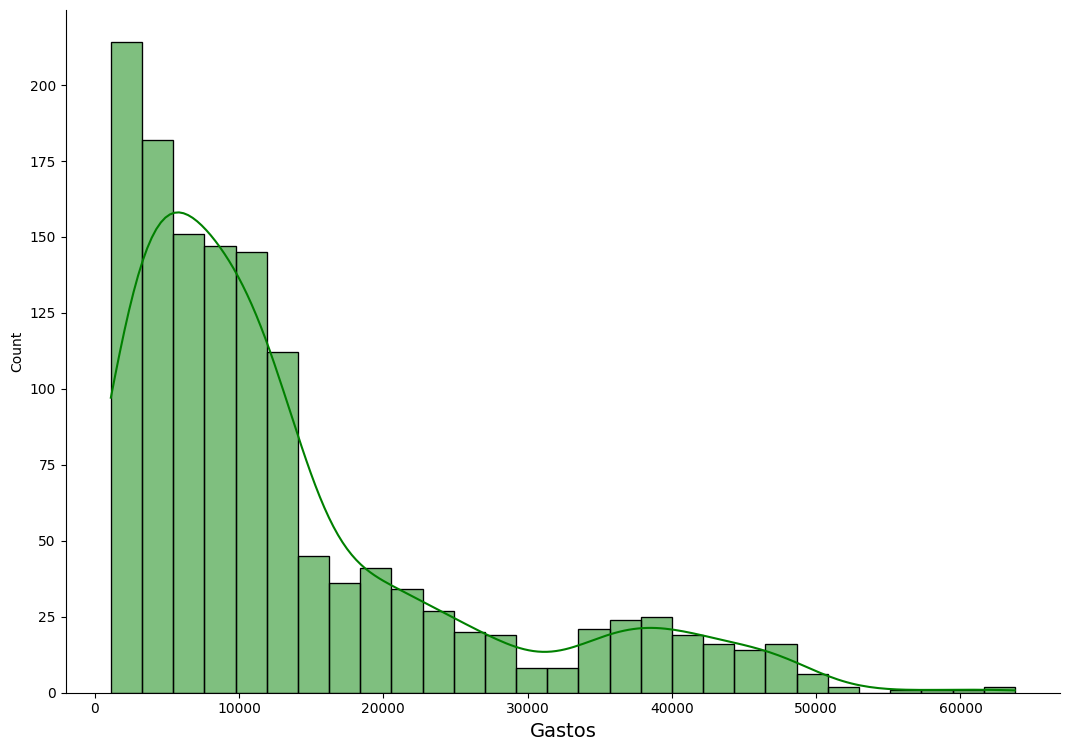

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ax = sns.displot(dados.custos, kde=True, color='g')
ax.figure.set_size_inches(12,8)
ax.set_titles('Distribuição dos Custos', fontsize=18)
ax.set_xlabels('Gastos', fontsize=14)

A distribuição é assimétrica à direita. Para aproximá-la de uma distribuição normal, aplicaremos o logaritmo aos valores.

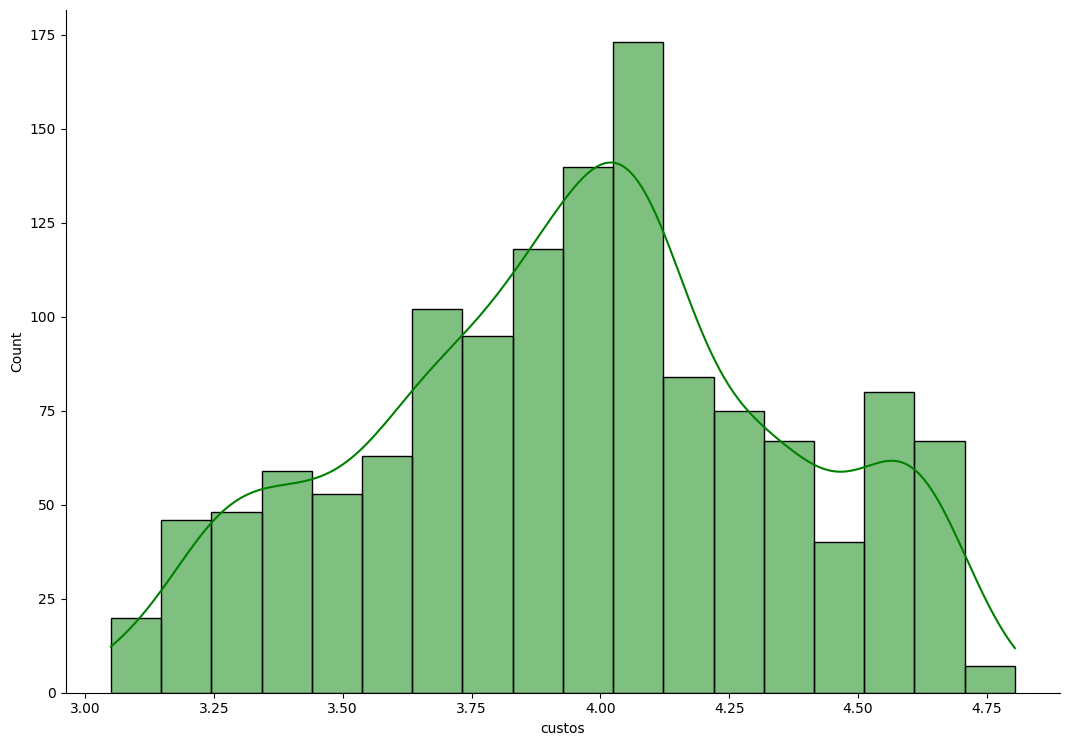

In [88]:
import numpy as np

#f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.displot(np.log10(dados.custos), kde = True, color = 'g' )
ax.figure.set_size_inches(12,8)

### Analisando os cutos por região

In [89]:
custos_por_regiao = dados.custos.groupby(dados.regiao).sum().sort_values(ascending = True)
custos_por_regiao


regiao
southwest    4.012755e+06
northwest    4.034072e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: custos, dtype: float64

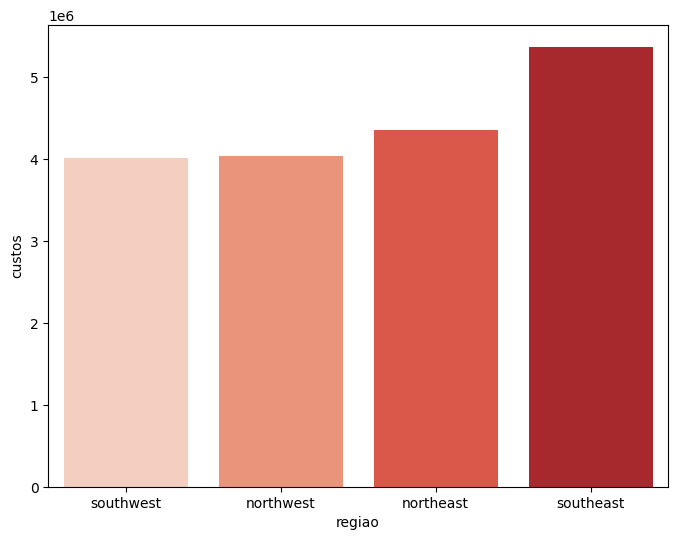

In [90]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(custos_por_regiao, palette='Reds')

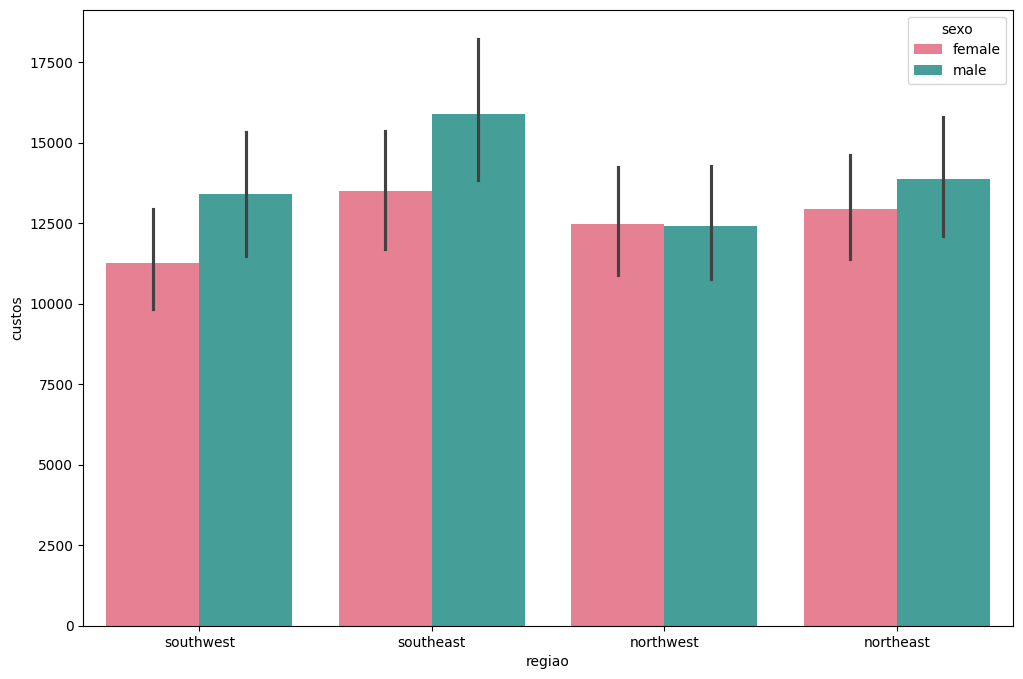

In [91]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='regiao', y='custos', hue='sexo', data=dados, palette='husl')

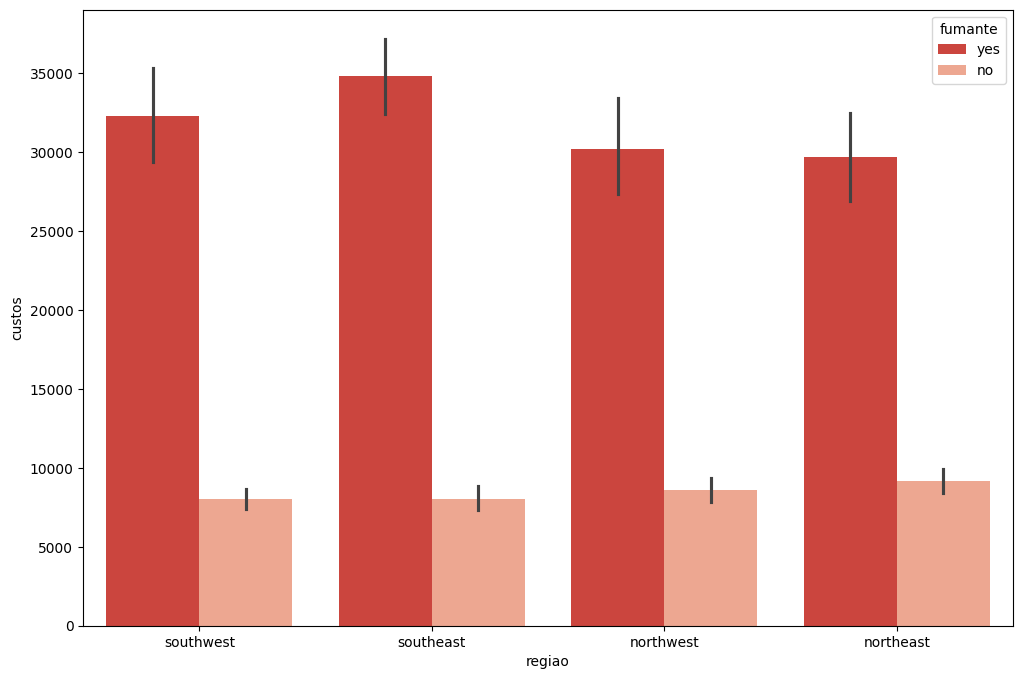

In [92]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'regiao', y = 'custos',
                 hue='fumante', data=dados, palette='Reds_r')

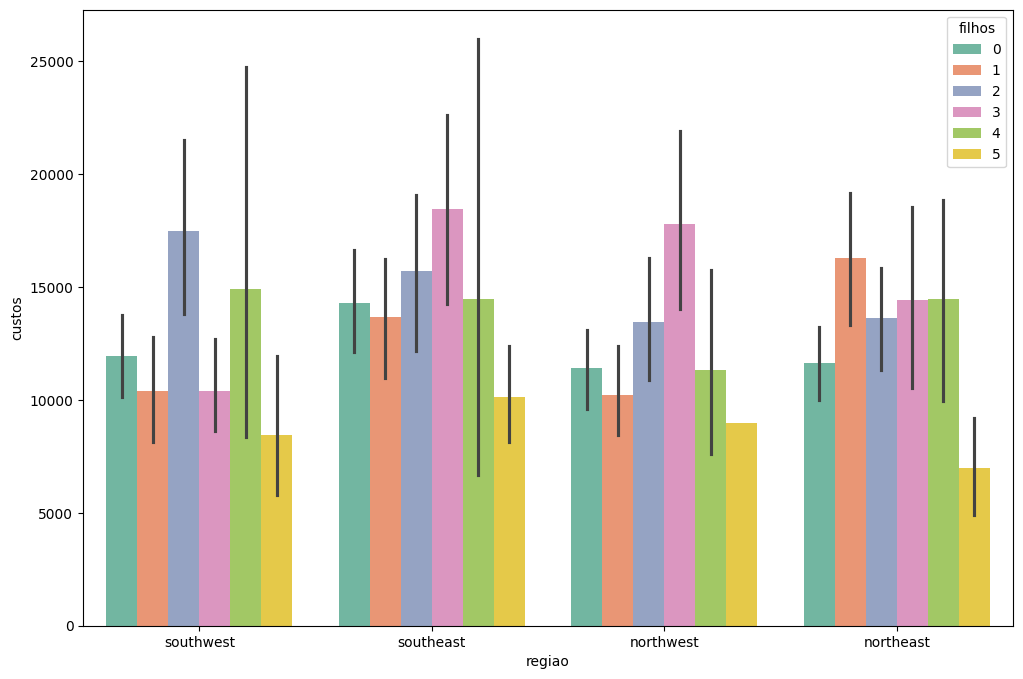

In [93]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='regiao', y='custos', hue='filhos', data=dados, palette='Set2')

In [94]:
dados.filhos.groupby(dados.filhos).sum().sort_values(ascending = True)

filhos
0      0
5     90
4    100
1    324
3    471
2    480
Name: filhos, dtype: int64

### Analisando os custos x fumante

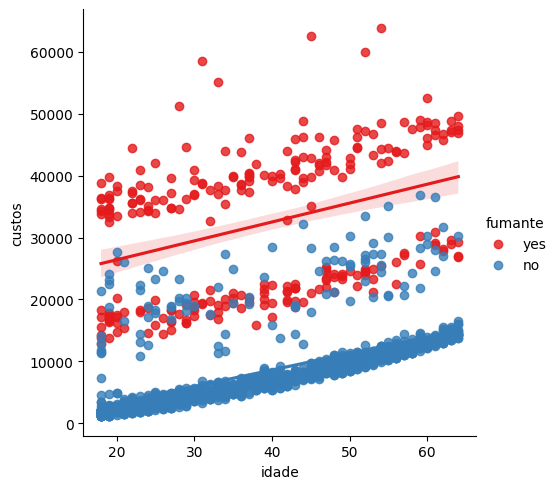

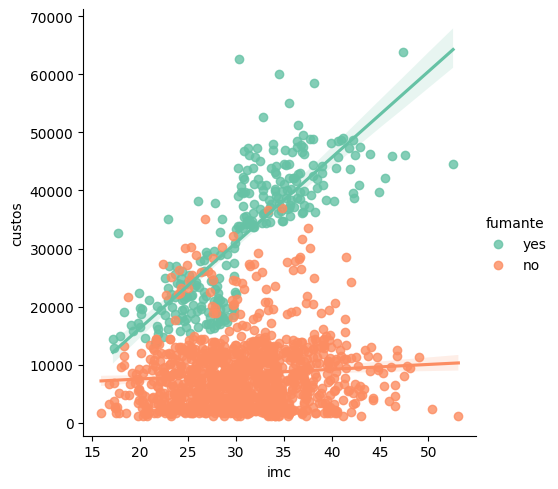

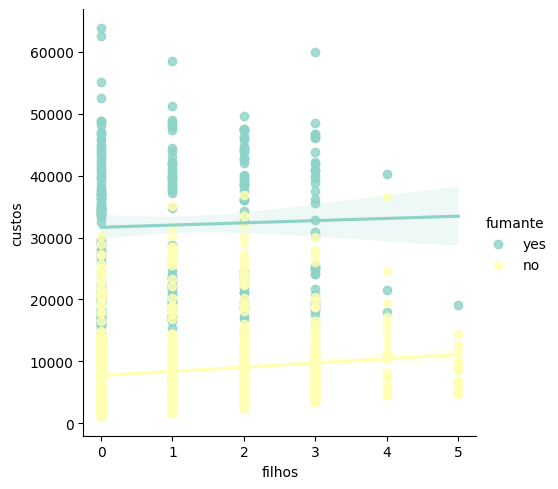

In [95]:
ax = sns.lmplot(x = 'idade', y = 'custos', data=dados, hue='fumante', palette='Set1')
ax = sns.lmplot(x = 'imc', y = 'custos', data=dados, hue='fumante', palette='Set2')
ax = sns.lmplot(x = 'filhos', y = 'custos', data=dados, hue='fumante', palette='Set3')

É possível notar que fumantes impactam consideravementes os custos

## Teste de Hipotese

Levantamos a seguinte Hipotese:

:Será que a divisão de faixa etária que é realizado pelos planos comerciais seguem algum sentido logico?

:Será que o perfil de custos seguem uma relação de tendencia para um determinado grupo étario?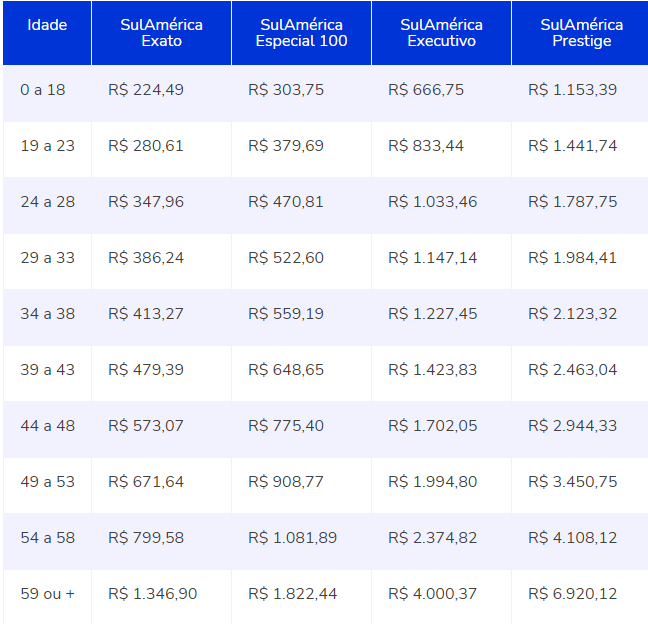

Para levantar as categorias de mercado, seguimos a tabela encontrada em um plano nacional:
 (https://saude.zelas.com.br/plano-de-saude/sulamerica)




### Faixa etaria

*   0= abaixo de 18 anos
*   1= de 19 a 23 anos
*   2= de 24 a 28 anos
*   3= de 29 a 33 anos
*   4= de 34 a 43 anos
*   5= de 44 a 48 anos
*   6= de 49 a 53 anos
*   7= de 54 a 58 anos
*   8= 59+



In [96]:
# Creating the categories and transforming continous variable to discrete categories
dados['faixa_etaria'] = pd.cut(dados["idade"],
                               bins=[0, 19, 24, 29, 34, 44, 49, 54, 58, np.inf],
                               labels=[0,1,2,3,4,5,6,7,8])


In [97]:
dados.head()

,idade,sexo,imc,filhos,fumante,regiao,custos,faixa_etaria
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,northwest,3866.85520,3


In [98]:
dados['faixa_etaria'].value_counts()

faixa_etaria
4    260
5    144
6    143
1    141
2    139
8    139
0    136
3    132
7    103
Name: count, dtype: int64

Observando a Distribuição das Faixas Etárias

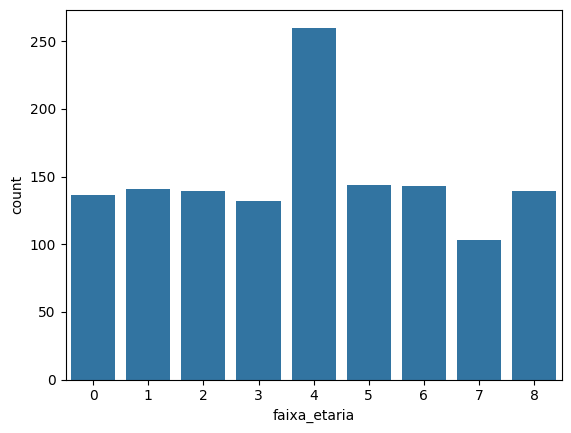

In [99]:
sns.countplot(x ='faixa_etaria', data = dados)
plt.show()

Usando o Describe para entender nossos dados, e criando a coluna de diferença entre o MAX-MIN

In [100]:
dados_desc = dados.groupby('faixa_etaria').custos.describe()
dados_desc['range'] = dados_desc['max'] - dados_desc['min']
dados_desc

,count,mean,std,min,25%,50%,75%,max,range
faixa_etaria,,,,,,,,,
0,136.0,8457.112375,11446.127052,1121.8739,1634.420500,2167.271950,13772.030762,39722.74620,38600.87230
1,141.0,9598.196894,12161.399832,1391.5287,2102.264700,2755.020950,15359.104500,44501.39820,43109.86950
2,139.0,9524.780741,10809.486898,2137.6536,3232.778400,4058.116100,16127.033275,51194.55914,49056.90554
3,132.0,11223.892815,12016.879348,3260.1990,4451.105275,5136.370650,16922.669562,58571.07448,55310.87548
4,260.0,13134.168693,11788.977468,4399.7310,6279.795550,7205.596325,18860.424103,48885.13561,44485.40461
5,144.0,14845.886117,11335.876025,7147.1050,8519.226750,9285.253650,20933.726835,62592.87309,55445.76809
6,143.0,16869.018882,12059.289727,8442.6670,9868.057525,10923.933200,23145.178180,63770.42801,55327.76101
7,103.0,15393.607900,9181.637213,10214.6360,11354.944250,11848.141000,12644.792400,48675.51770,38460.88170
8,139.0,20824.972901,12252.425356,11743.2990,13143.600750,14119.620000,27875.006340,52590.82939,40847.53039


Agora Observamos a relação das metricas de Custo com a Faixa Etaria

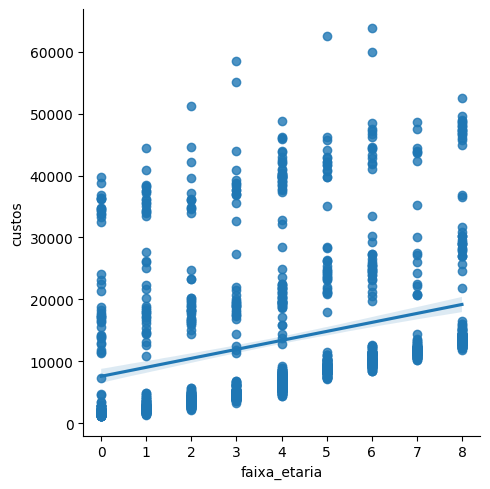

In [101]:
ax = sns.lmplot(x = 'faixa_etaria', y = 'custos', data=dados, palette='Set1')

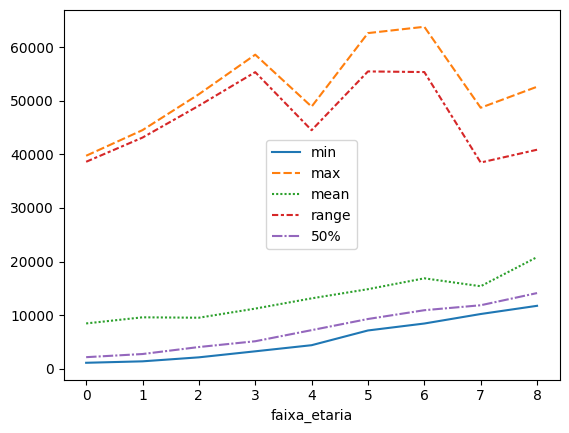

In [102]:
sns.lineplot(data=dados_desc[['min', 'max', 'mean', 'range', '50%']])
plt.show()


<Axes: xlabel='faixa_etaria', ylabel='mean'>

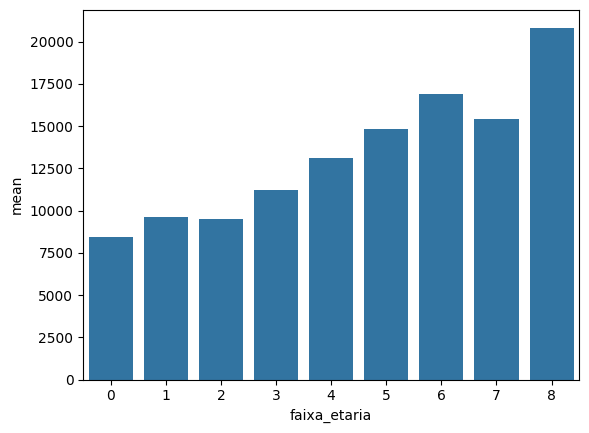

In [103]:
sns.barplot(x = "faixa_etaria", y = "mean", data = dados_desc)

<Axes: xlabel='faixa_etaria', ylabel='max'>

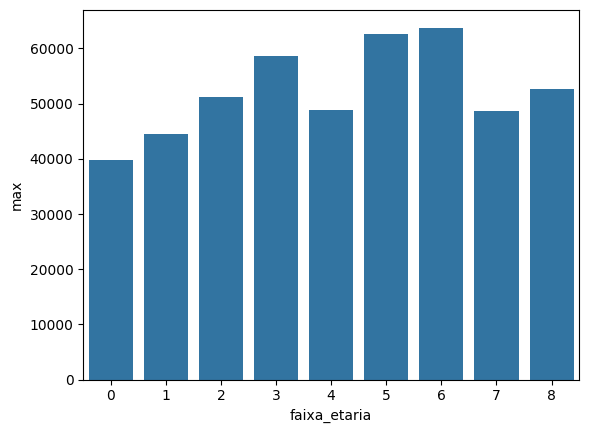

In [104]:
sns.barplot(x = "faixa_etaria", y = "max", data = dados_desc)

<Axes: xlabel='faixa_etaria', ylabel='min'>

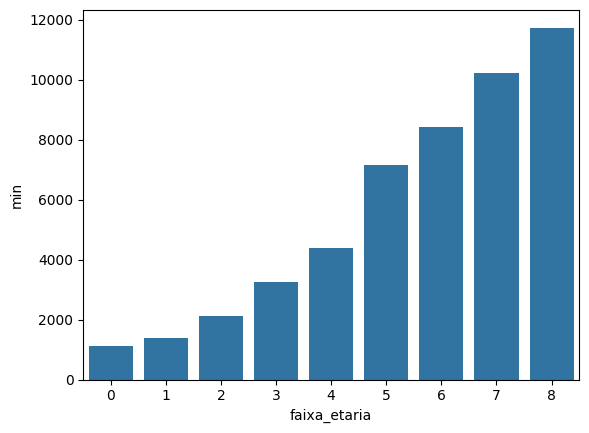

In [105]:
sns.barplot(x = "faixa_etaria", y = "min", data = dados_desc)

<Axes: xlabel='faixa_etaria', ylabel='range'>

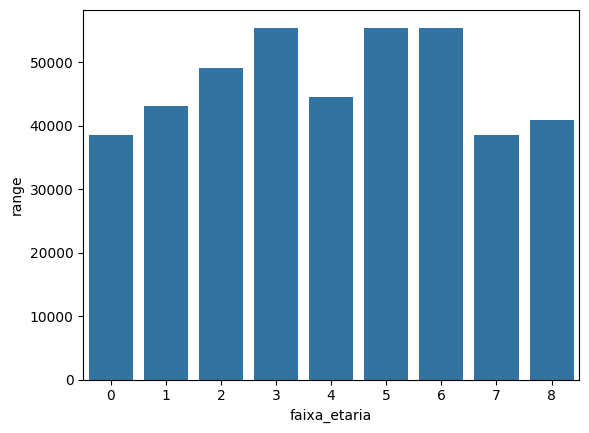

In [106]:
sns.barplot(x = "faixa_etaria", y = "range", data = dados_desc)

Ja tinhamos verificado a tendencia de aumento de custo medio e do custo minimo com relação a idade.
O que percebemos criando categorias é que a variação de custo médio de variação e a diferença entre o maximo e o minimo dentre as faixa etária é diferente, ou seja, o comportamento de custo dentre as faixas etárias é diferente.

O que pode nos indicar a ideia de categorizar as faixas etarias alem de de facilidade de calculo dos planos de saude, seria assegurar o certo enquadramento do comportamento do custo do novo associado diminuindo os riscos de erro na estimativa.

# Pre-processamento

In [107]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [108]:
dados['sexo'] = encoder.fit_transform(dados['sexo'])
dados['fumante'] = encoder.fit_transform(dados['fumante'])
dados['regiao'] = encoder.fit_transform(dados['regiao'])

dados.head()

,idade,sexo,imc,filhos,fumante,regiao,custos,faixa_etaria
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,1,21984.47061,3
4,32,1,28.880,0,0,1,3866.85520,3


Matriz de correlação

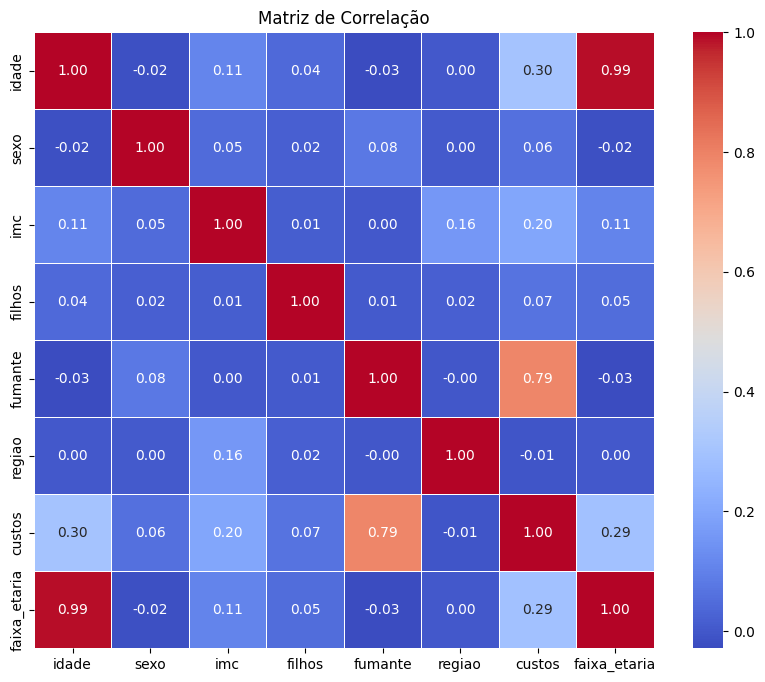

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

## Separando os dados de Treinamento e Teste

In [110]:
from sklearn.model_selection import train_test_split
#removendo os custos e idade do eixo X
x = dados.drop(['custos', 'faixa_etaria'], axis = 1)
y = dados['custos'].astype(int)

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Aplicando o MinMaxScaler

In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

# Validação Cruzada

In [113]:
#@title Função para a validação cruzada para modelos de Regressão (Linear, DecisionTree, RandomForest, SVR, ...)

def AplicaValidacaoCruzada(x_axis, y_axis, n_splits):
  # Linear Models.
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.svm import SVR
  from sklearn import ensemble
  from sklearn.ensemble import AdaBoostRegressor

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # Configuração de KFold.
  kfold  = KFold(n_splits=n_splits, shuffle=True)

  # Axis
  x = x_axis
  y = y_axis

  # Criando os modelos

  # Linear Regression
  lr = LinearRegression()
  lr.fit(x, y)

  # Decision Tree
  dt = DecisionTreeRegressor(random_state = 42, max_depth = 5)
  dt.fit(x, y)

  # Random Forest
  rf = RandomForestRegressor(random_state = 42, max_depth = 5, n_estimators = 10)
  rf.fit(x, y)

  # SVR
  svr = SVR(kernel="linear", C=100, gamma="auto")
  svr.fit(x, y)

  #Gradient boosting
  gbr = ensemble.GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=30, min_samples_split=10,
                                                                 min_samples_leaf=6, max_features=0.6, loss='huber')
  gbr.fit(x, y)

  #AdaBoost
  ab = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42)
  ab.fit(x, y)


  # Applyes KFold to models.
  lr_result = cross_val_score(lr, x, y, cv = kfold, scoring='r2')
  dt_result = cross_val_score(dt, x, y, cv = kfold, scoring='r2')
  rf_result = cross_val_score(rf, x, y, cv = kfold, scoring='r2')
  svr_result = cross_val_score(svr, x, y, cv = kfold, scoring='r2')
  gbr_result = cross_val_score(gbr, x, y, cv = kfold, scoring='r2')
  ab_result = cross_val_score(ab, x, y, cv = kfold, scoring='r2')

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "Linear Regression": lr_result.mean(),
    "Decision Tree": dt_result.mean(),
    "Random Forest": rf_result.mean(),
    "SVR": svr_result.mean(),
    "Gradient boosting": gbr_result.mean(),
    "AdaBoost": ab_result.mean()
  }

  # Select the best model.
  melhorModelo = max(dic_models, key=dic_models.get)

  for key in dic_models.keys():
    print(f"{key}: {dic_models[key]}")

  print("-----------------------------------------------------------")
  print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))

Com a Validação Cruzada, é possivel realizar a validação entre mais de um modelo ao mesmo tempo.

In [114]:
AplicaValidacaoCruzada(x, y, 10)

Linear Regression: 0.7335287132648353
Decision Tree: 0.8412011138434193
Random Forest: 0.848707983896033
SVR: 0.5455595946589442
Gradient boosting: 0.8399108058877947
AdaBoost: 0.7104749939522912
-----------------------------------------------------------
O melhor modelo é : Random Forest com o valor: 0.848707983896033


# Aplicando os modelos

Apos a Validação cruzada, podemos realizar o treinamento individual dos modelos para comprovar os resultados encontrados.




## Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [116]:
linear_regression = LinearRegression()
linear_regression.fit(x_train_scaled, y_train)

LinearRegression()

In [117]:
print(linear_regression.intercept_) ## (Y)isso representa o efeito médio, excluindo o efeito das outras variáveis, como se elas fossem 0. Custo medio independente das outras variáveis

-1581.238104226666


### Calculando coef_

O `coef_` calcula o efeito em Y(custos) quando um variável muda apenas uma unidade e as outras se mantem constante. O resultado abaixo exibe na ordem em que entraram no modelo. No caso idade, sexo, IMC, etd

In [118]:
print(linear_regression.coef_)


[11443.17897767   -99.66461789 11619.72768424  2670.65015851
 23052.13393796  -712.87999698]


### Teste de Previsão

In [119]:
y_predito = linear_regression.predict(x_test_scaled)

Metricas

In [120]:
from sklearn.metrics import r2_score, mean_squared_error #métricas de validação

mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")


Mean Squared Error: 35493280.36672753
Root Mean Squared Error: 5957.623718121809
R2 Score: 80.68% 


## Decision Tree

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
dt_regressor = DecisionTreeRegressor(random_state = 42, max_depth = 5)

Treinamento

In [123]:
dt_regressor.fit(x_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

Teste de previsão

In [124]:
y_predito = dt_regressor.predict(x_test_scaled)

Metricas

In [125]:
from sklearn.metrics import r2_score, mean_squared_error #métricas de validação

mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")

Mean Squared Error: 19778265.77327144
Root Mean Squared Error: 4447.276219583335
R2 Score: 89.24% 


## Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
random_forest_regressor = RandomForestRegressor(n_estimators = 100, criterion = 'friedman_mse', max_depth = 5,
                              random_state = 1,
                              n_jobs = -1)

Treinamento

In [128]:
random_forest_regressor.fit(x_train_scaled,y_train)



RandomForestRegressor(criterion='friedman_mse', max_depth=5, n_jobs=-1,
                      random_state=1)

Teste de previsão

In [129]:
y_predito = random_forest_regressor.predict(x_test_scaled)

Metricas

In [130]:
from sklearn.metrics import r2_score, mean_squared_error #métricas de validação

mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")

Mean Squared Error: 18165013.692573413
Root Mean Squared Error: 4262.043370564572
R2 Score: 90.11% 


In [131]:
random_forest_regressor.estimators_[0].tree_.max_depth

5

In [132]:
from sklearn import tree
plt.figure(figsize=(100,100))
_ = tree.plot_tree(random_forest_regressor.estimators_[0], feature_names=x.columns, filled=True)

## Gradient Boosting Regressor

In [133]:
from sklearn import ensemble

In [134]:
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=10, min_samples_split=10,
                                                                 min_samples_leaf=6, max_features=0.6, loss='huber')

Treinamento

In [135]:
gradient_boosting_regressor.fit(x_train_scaled, y_train)

GradientBoostingRegressor(loss='huber', max_depth=10, max_features=0.6,
                          min_samples_leaf=6, min_samples_split=10,
                          n_estimators=150)

Teste de Predição

In [136]:
y_predito = gradient_boosting_regressor.predict(x_test_scaled)

Metricas de validação

In [137]:
from sklearn.metrics import r2_score, mean_squared_error #métricas de validação

mse = mean_squared_error(y_test, y_predito)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predito)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {(r2 * 100).round(2)}% ")

Mean Squared Error: 20161029.13214719
Root Mean Squared Error: 4490.103465639427
R2 Score: 89.03% 
